# Glass Type Prediction according to quantity while mixing.
 
### Preprocess the data i.e 
1) check missing values

2) check outliers using boxplot, 

3) if outliers are present then use scaling and then 

4) apply decision tree classifier, 

7) check accuracy, 

8) root mean square error, 

9) r square.

### Target variable - Type
( Hint : Label encode the Target variable. )

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn import preprocessing

In [3]:
df = pd.read_csv("E:\ML\AISS\glass_1\glass.csv")

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


In [6]:
df.shape

(214, 10)

In [7]:
df['Type'].unique() 

array(["'build wind float'", "'vehic wind float'", 'tableware',
       "'build wind non-float'", 'headlamps', 'containers'], dtype=object)

In [8]:
label_encoder = preprocessing.LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Type'].unique()

array([0, 2, 5, 1, 4, 3], dtype=int64)

#### No Missing Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int32
dtypes: float64(9), int32(1)
memory usage: 16.0 KB


In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,1.448598
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,1.533560
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,1.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,2.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,5.000000


###  Boxplot
#### Outliers : RI, K, Na, Al, Si, Ca, Ba, Fe
#### No Outliers : Mg

In [11]:
# check outlier in K
Q1 = df.K.quantile(0.25)
Q3 = df.K.quantile(0.75)
#Q1, Q3
IQR = Q3 - Q1
#IQR
ll = Q1 - 1.5*IQR
ul = Q3 + 1.5*IQR
#ll, ul
df[(df.K<ll) | (df.K>ul)].shape

(7, 10)

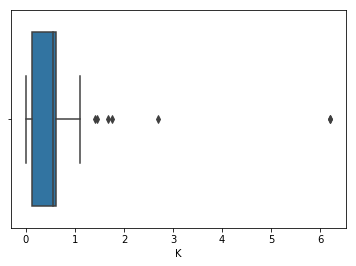

In [12]:
sns.boxplot(x="K", data=df)

In [13]:
#df_no_outlier = df[(df.K > ll) & (df.K < ul)]
#df_no_outlier.shape

In [14]:
# check outlier in RI
Q1 = df.RI.quantile(0.25)
Q3 = df.RI.quantile(0.75)
#Q1, Q3
IQR = Q3 - Q1
#IQR
ll = Q1 - 1.5*IQR
ul = Q3 + 1.5*IQR
#ll, ul
df[(df.RI<ll) | (df.RI>ul)].shape

(17, 10)

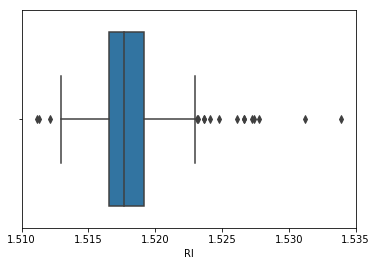

In [15]:
sns.boxplot(x="RI", data=df)

In [16]:
# check outlier in Na
Q1 = df.Na.quantile(0.25)
Q3 = df.Na.quantile(0.75)
#Q1, Q3
IQR = Q3 - Q1
#IQR
ll = Q1 - 1.5*IQR
ul = Q3 + 1.5*IQR
#ll, ul
df[(df.Na<ll) | (df.Na>ul)].shape

(7, 10)

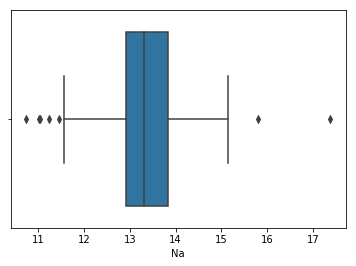

In [17]:
sns.boxplot(x="Na", data=df)

In [18]:
#sns.boxplot(x=df["Na"], y=df["Type"])

In [19]:
# check outlier in Al
Q1 = df.Al.quantile(0.25)
Q3 = df.Al.quantile(0.75)
#Q1, Q3
IQR = Q3 - Q1
#IQR
ll = Q1 - 1.5*IQR
ul = Q3 + 1.5*IQR
#ll, ul
df[(df.Al<ll) | (df.Al>ul)].shape

(18, 10)

In [20]:
# check outlier in Si
Q1 = df.Si.quantile(0.25)
Q3 = df.Si.quantile(0.75)
#Q1, Q3
IQR = Q3 - Q1
#IQR
ll = Q1 - 1.5*IQR
ul = Q3 + 1.5*IQR
#ll, ul
df[(df.Si<ll) | (df.Si>ul)].shape

(12, 10)

In [21]:
# check outlier in Ca
Q1 = df.Ca.quantile(0.25)
Q3 = df.Ca.quantile(0.75)
#Q1, Q3
IQR = Q3 - Q1
#IQR
ll = Q1 - 1.5*IQR
ul = Q3 + 1.5*IQR
#ll, ul
df[(df.Ca<ll) | (df.Ca>ul)].shape

(26, 10)

In [22]:
# check outlier in Ba
Q1 = df.Ba.quantile(0.25)
Q3 = df.Ba.quantile(0.75)
#Q1, Q3
IQR = Q3 - Q1
#IQR
ll = Q1 - 1.5*IQR
ul = Q3 + 1.5*IQR
#ll, ul
df[(df.Ba<ll) | (df.Ba>ul)].shape


(38, 10)

In [23]:
# check outlier in Fe
Q1 = df.Fe.quantile(0.25)
Q3 = df.Fe.quantile(0.75)
#Q1, Q3
IQR = Q3 - Q1
#IQR
ll = Q1 - 1.5*IQR
ul = Q3 + 1.5*IQR
#ll, ul
df[(df.Fe<ll) | (df.Fe>ul)].shape

(12, 10)

###  Scaling
* MinMaxScalar
* RobustScalar
* StandardScalar
* Normalizer

In [24]:
from sklearn.preprocessing import MinMaxScaler

mmscalar = MinMaxScaler()

df[["RI", "K", "Na", "Al", "Si", "Ca", "Ba", "Fe"]] = mmscalar.fit_transform(df[["RI", "K", "Na", "Al", "Si", "Ca", "Ba", "Fe"]])

Data Splitting

In [25]:
X = df.values[:,0:9]
Y = df.values[:,9]
#X,Y

In [26]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

### Gradient Boost Classifier with different learning rate

In [28]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.832
Accuracy score (validation): 0.631
Learning rate:  0.075
Accuracy score (training): 0.872
Accuracy score (validation): 0.662
Learning rate:  0.1
Accuracy score (training): 0.872
Accuracy score (validation): 0.646
Learning rate:  0.25
Accuracy score (training): 0.973
Accuracy score (validation): 0.692
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.662
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.692
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.677


In [34]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
y_pred = gb_clf2.predict(X_test)

#print("Confusion Matrix:")
#print(confusion_matrix(y_test, predictions))

#p#rint("Classification Report")
#print(classification_report(y_test, predictions))



from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


print("\n\nConfusion Matrix: \n\n", confusion_matrix(y_test, y_pred))
print ("\n\nAccuracy : \n\n", accuracy_score(y_test,y_pred)*100)
print("\n\nReport : \n\n", classification_report(y_test, y_pred))



Confusion Matrix: 

 [[21  2  0  0  0  0]
 [ 6 14  1  1  0  0]
 [ 0  1  1  0  0  0]
 [ 0  3  0  1  0  0]
 [ 1  2  0  1  7  0]
 [ 0  2  0  0  0  1]]


Accuracy : 

 69.23076923076923


Report : 

               precision    recall  f1-score   support

         0.0       0.75      0.91      0.82        23
         1.0       0.58      0.64      0.61        22
         2.0       0.50      0.50      0.50         2
         3.0       0.33      0.25      0.29         4
         4.0       1.00      0.64      0.78        11
         5.0       1.00      0.33      0.50         3

   micro avg       0.69      0.69      0.69        65
   macro avg       0.69      0.54      0.58        65
weighted avg       0.71      0.69      0.69        65



### Accuracy for Gradient Boost Classifier = 69.23076923076923

### OB ) RMS
### OB ) R Square

In [35]:
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 1.1961476626107794


In [38]:
from sklearn.metrics import mean_squared_error
import math

mse = math.sqrt(mean_squared_error(y_test, y_pred)) 
print('Root mean square error', mse) 


Root mean square error 1.1961476626107794


In [39]:
from sklearn.metrics import r2_score 
  

r2_score(y_test, y_pred) 

0.4600750267952839